In [1]:
import sys
sys.path.insert(0, "../../python")

import os
import numpy as np
from vsim import plot
from vsim import load
from vsim import analyze
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
from scipy.optimize import curve_fit
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]
c = const.physical_constants['speed of light in vacuum'][0]

path = '/home/robert/CU-PWFA/emittance_preservation/simulations/SmallTests/Test1/'
simName = 'MatchedBeams'

In [11]:
# A better parameter to look at might be the drive beam energy and see how it is being decelerated
species = 'ElectronBeam'
file = plot.get_filename(path, simName, species, 10)
data = load.get_species_data(file, species)
Ndrive = np.shape(data)[0]
species = 'WitnessBeam'
file = plot.get_filename(path, simName, species, 10)
data = load.get_species_data(file, species)
Nwitness = np.shape(data)[0]
species = 'electrons'
file = plot.get_filename(path, simName, species, 10)
data = load.get_species_data(file, species)
Nplasma = np.shape(data)[0]
print('Drive:   %05d' % Ndrive)
print('Witness: %05d' % Nwitness)
print('Plasma:  %05d' % Nplasma)
print('Total:   %05d' % (Ndrive+Nwitness+Nplasma))

Drive:   58176
Witness: 81536
Plasma:  14151892
Total:   14291604


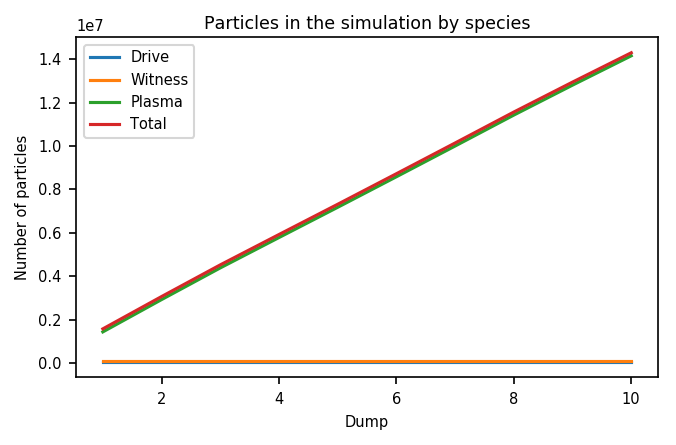

In [19]:
dumps = 10
Ndrive = np.zeros(dumps)
Nwitness = np.zeros(dumps)
Nplasma = np.zeros(dumps)
Ntotal = np.zeros(dumps)
for i in range(dumps):
    species = 'ElectronBeam'
    file = plot.get_filename(path, simName, species, i+1)
    data = load.get_species_data(file, species)
    Ndrive[i] = np.shape(data)[0]
    species = 'WitnessBeam'
    file = plot.get_filename(path, simName, species, i+1)
    data = load.get_species_data(file, species)
    Nwitness[i] = np.shape(data)[0]
    species = 'electrons'
    file = plot.get_filename(path, simName, species, i+1)
    data = load.get_species_data(file, species)
    Nplasma[i] = np.shape(data)[0]
Ntotal = Ndrive + Nwitness + Nplasma

dump = np.linspace(1, 10, 10)
plt.figure(figsize=(5,3), dpi=150)
plt.plot(dump, Ndrive, label='Drive')
plt.plot(dump, Nwitness, label='Witness')
plt.plot(dump, Nplasma, label='Plasma')
plt.plot(dump, Ntotal, label='Total')
plt.title('Particles in the simulation by species')
plt.xlabel('Dump')
plt.ylabel('Number of particles')
plt.legend()
plt.show()